In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/drive/My Drive/ds203_assignment/0.csv", header=None)

In [3]:
df.shape

(2910, 65)

In [4]:
for i in range(1, 4):
  df_ = pd.read_csv("/content/drive/My Drive/ds203_assignment/"+str(i)+".csv", header=None)
  df=df.append(df_, ignore_index=True)

In [5]:
df.shape

(11678, 65)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,4.0,13.0,-18.0,-30.0,-119.0,-45.0,17.0,6.0,-1.0,-9.0,27.0,20.0,91.0,71.0,-26.0,-1.0,0.0,1.0,13.0,20.0,-62.0,-19.0,29.0,2.0,2.0,0.0,-23.0,-1.0,-80.0,4.0,-7.0,-6.0,-12.0,-27.0,-11.0,-16.0,-67.0,-8.0,-27.0,1.0,1.0,13.0,-8.0,-11.0,21.0,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,0.0,7.0,-31.0,-33.0,-48.0,-52.0,34.0,10.0,5.0,-9.0,23.0,63.0,76.0,49.0,-27.0,-7.0,-7.0,-3.0,0.0,4.0,-111.0,-2.0,-7.0,7.0,11.0,11.0,2.0,2.0,76.0,3.0,7.0,-2.0,0.0,-6.0,21.0,-3.0,0.0,-8.0,-40.0,-4.0,-1.0,6.0,-2.0,-2.0,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,4.0,16.0,24.0,9.0,33.0,34.0,-1.0,-4.0,-3.0,-6.0,-7.0,-11.0,-85.0,-12.0,-10.0,-2.0,-3.0,-2.0,-8.0,-30.0,-16.0,-22.0,-21.0,-7.0,-8.0,-12.0,-14.0,-18.0,-76.0,-44.0,27.0,7.0,4.0,-4.0,-10.0,23.0,127.0,69.0,-25.0,-12.0,-9.0,1.0,18.0,-33.0,-128.0,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,-3.0,-4.0,18.0,21.0,-9.0,2.0,-8.0,0.0,3.0,5.0,-14.0,-15.0,13.0,-13.0,11.0,-4.0,-5.0,-8.0,-30.0,-27.0,-128.0,-22.0,-3.0,-5.0,-8.0,0.0,25.0,-9.0,-28.0,2.0,-22.0,8.0,8.0,-2.0,2.0,12.0,53.0,20.0,28.0,-9.0,-5.0,-5.0,-7.0,-7.0,-54.0,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,4.0,13.0,13.0,-16.0,-45.0,-7.0,-84.0,-8.0,-3.0,-4.0,-36.0,-26.0,-128.0,-55.0,75.0,3.0,-8.0,-12.0,14.0,12.0,87.0,56.0,-3.0,2.0,0.0,-7.0,4.0,15.0,-13.0,0.0,-15.0,1.0,3.0,8.0,-2.0,-6.0,-55.0,-24.0,1.0,5.0,5.0,2.0,11.0,12.0,60.0,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


In [7]:
# this is supervised learning problem and a categorical variable has to be predicted
# col64 has to be predicted (action)
# performance will be measured by accuracy
# we cannot drop any variables, as they are sensor readings
# all variables (after apt preprocessing) will be used in the prediction
# i.e. all variables are usable

In [8]:
df.isnull().sum().sum()

0

In [9]:
# all features are continuous
# hence only normalization is required

In [10]:
df_x = df.drop(64, axis=1)
df_y=df[64]
data_x = df_x.to_numpy()
data_y = df_y.to_numpy()

In [11]:
from sklearn.preprocessing import StandardScaler as SS
ss=SS()
data_x=ss.fit_transform(data_x)

In [12]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
data_y_ohe = ohe.fit_transform(data_y.reshape(-1,1)).toarray()

In [13]:
# framework1: Neural Network with one hidden layer
# framework2: Logistic Regression

In [14]:
l=data_x.shape[0]
indices = np.random.permutation(l)
idx_train, idx_val, idx_test = indices[:int(l*0.7)], indices[int(l*0.7):int(l*0.85)], indices[int(l*0.85):]
x_train, x_val, x_test = data_x[idx_train,:], data_x[idx_val,:], data_x[idx_test,:]
y_train, y_val, y_test = data_y[idx_train], data_y[idx_val], data_y[idx_test]
y_train_ohe, y_val_ohe, y_test_ohe = data_y_ohe[idx_train], data_y_ohe[idx_val], data_y_ohe[idx_test]

In [15]:
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier

In [16]:
x_train_main = np.concatenate((x_train, x_val))
y_train_main = np.concatenate((y_train, y_val))
y_train_main_ohe = np.concatenate((y_train_ohe, y_val_ohe))

In [17]:
nn=MLPClassifier(tol=1, learning_rate_init=1) # for faster convergence

In [18]:
nn_hl_sizes=[(i*20,) for i in range(1, 20)]
nn_alpha_vals=[0, 0.001, 0.003, 0.01, 0.03, 0.1]
distributions = dict(alpha=nn_alpha_vals,
                     hidden_layer_sizes=nn_hl_sizes)

In [19]:
clf = RandomizedSearchCV(nn, distributions, random_state=0, cv=5, n_iter=5)

In [ ]:
nn_search = clf.fit(x_train_main, y_train_main_ohe)

In [21]:
print(nn_search.best_params_)
y_val_pred=nn_search.predict_proba(x_val)

{'hidden_layer_sizes': (300,), 'alpha': 0.001}


In [22]:
y_pred=np.argmax(y_val_pred, axis=1)
np.sum(y_pred==y_val)/len(y_val)

0.9006849315068494

In [23]:
log_reg_c_vals=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
distributions = dict(C=log_reg_c_vals)

In [24]:
lr=LogisticRegression()
clf = RandomizedSearchCV(lr, distributions, random_state=0, cv=5, n_iter=5)

In [25]:
lr_search = clf.fit(x_train_main, y_train_main)

In [26]:
lr_search.best_params_

{'C': 0.1}

In [27]:
y_val_pred=lr_search.predict(x_val)
np.sum(y_val_pred==y_val)/len(y_val)

0.3573059360730594

One hidden layer Neural Network performs better

The optimal hyperparameters were found to be:

  alpha=0

  hidden_layer_size=220

In [29]:
y_test_pred=nn_search.predict_proba(x_test)
y_pred=np.argmax(y_test_pred, axis=1)
np.sum(y_pred==y_test)/len(y_test)

0.8361872146118722

In [30]:
print(y_test[:10], y_pred[:10])

[3 0 0 3 0 3 2 1 0 0] [1 0 0 3 0 1 1 2 0 0]


In [31]:
# the model is not extremely accurate, but it predicts the correct movement with good accuracy
# we conclude that the model is usable

PCA

In [33]:
# normalized x
data_x

array([[ 1.42844465,  0.40172416,  1.15017871, ..., -0.25930316,
        -2.27845447,  1.06952398],
       [-2.50349217, -0.44815532, -0.85393746, ...,  0.83658776,
         4.45191202,  1.0051301 ],
       [-0.99535202, -0.61813122, -1.45517231, ...,  0.83658776,
         4.57068319,  3.1301281 ],
       ...,
       [-0.02583335, -0.19319148, -0.05229099, ..., -1.12036032,
        -0.14057335,  0.03922193],
       [ 0.08189094,  0.40172416,  0.9497671 , ..., -3.50783697,
         0.17614978,  0.36119132],
       [-0.0796955 ,  0.40172416,  0.54894386, ...,  2.51956311,
         0.49287291,  0.36119132]])

In [34]:
from sklearn.decomposition import PCA

In [92]:
nrmse={}

In [117]:
# https://stats.stackexchange.com/questions/184603/in-pca-what-is-the-connection-between-explained-variance-and-squared-error/187902
def norm_rmse(exp_var_rat):
  nrmse=1-exp_var_rat
  return nrmse

In [118]:
p=PCA()
x_pca=p.fit_transform(data_x)
for i in range(1, data_x.shape[1]+1):
  nrmse[i]=norm_rmse(p.explained_variance_ratio_[:i+1].sum())

In [97]:
import matplotlib.pyplot as plt

In [119]:
plt_y=list(nrmse.values())
plt_x=list(nrmse.keys())

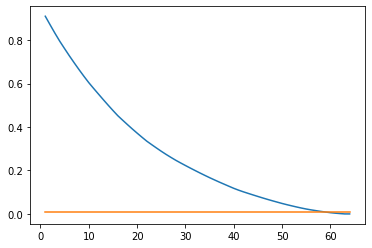

In [120]:
plt.plot(plt_x, plt_y)
plt.plot(plt_x, np.ones_like(plt_x)*0.01)

In [124]:
nrmse[58]

0.01167899982311249

In [125]:
nrmse[59]

0.008638237154944717

In [126]:
# Hence 58 dimensions are needed for less than 1% nrmse